## The purpose of the Capstone 2 project is to determine whether or not the lesion in an image is malignant or not 

Data source(ISIC) provides a link to download the images from the website directly.<br>
Therefore, I used the code built by "GalAvineri" on Github to download all the available images on the website.

In [1]:
!git clone https://github.com/GalAvineri/ISIC-Archive-Downloader.git

fatal: destination path 'ISIC-Archive-Downloader' already exists and is not an empty directory.


In [ ]:
!python ISIC-Archive-Downloader/download_archive.py

import necessary libraries

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import json

Get the path of the ISIC data and load metadata

In [2]:
image_path='./Data/Images/'
meta_path='./Data/Descriptions/'

imagelist=os.listdir(image_path)
metalist=os.listdir(meta_path)

pics=[file for file in imagelist]
meta=[file for file in metalist]

The size of the images were checked to see how much it varies

In [3]:
img_size_dict=dict()
from PIL import Image
for i in range(len(pics)):
    filename = pics[i]
    img = Image.open(image_path+filename)
    width, height = img.size
    img_size_dict[filename]=width * height

(array([1.2018e+04, 8.4580e+03, 1.0100e+02, 2.2230e+03, 1.0000e+00,
        3.0000e+00, 0.0000e+00, 5.0000e+00, 1.0000e+00, 1.0960e+03]),
 array([  270000. ,  3287923.2,  6305846.4,  9323769.6, 12341692.8,
        15359616. , 18377539.2, 21395462.4, 24413385.6, 27431308.8,
        30449232. ]),
 <a list of 10 Patch objects>)

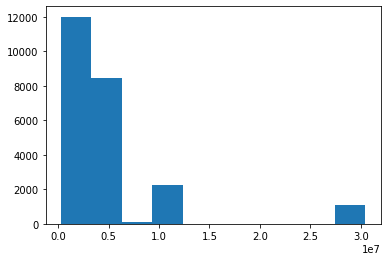

In [4]:
imgsize_var=list(img_size_dict.values())
plt.hist(imgsize_var)

In [5]:
min(imgsize_var)

270000

In [6]:
max(imgsize_var)

30449232

In [7]:
len(meta)

23906

In [8]:
import json
from pandas.io.json import json_normalize
import pandas as pd

for file in meta:
    filename=meta_path+'/'+file
    f=open(filename,"rt")
    data=json.load(f)
    if "df" not in locals():
        df=json_normalize(data)
    else:
        df1=json_normalize(data)
        df=df.append(df1,ignore_index=True)

/home/seo/environments/my_env/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [9]:
df.head()

,_id,_modelType,created,creator._id,creator.name,dataset._accessLevel,dataset._id,dataset.description,dataset.license,dataset.name,...,meta.unstructured.race,meta.unstructured.site,meta.unstructured.ulcer,meta.unstructured.vertical,name,notes.reviewed.accepted,notes.reviewed.time,notes.reviewed.userId,notes.tags,updated
0,558d618dbae47801cf734963,image,2015-06-26T14:28:29.770000+00:00,54cb974fbae47819d8e4c727,User GQZH,0,5a2ecc5d1165975c94594284,Biopsy-confirmed melanocytic and non-melanocyt...,CC-0,MSK-2,...,NaN,NaN,NaN,NaN,ISIC_0010281,True,2015-07-02T18:01:14.906000+00:00,5450e996bae47865794e4d0d,[],2015-10-02T15:33:45.996000+00:00
1,550902ddbae478359aa587e2,image,2015-03-18T04:45:17.559000+00:00,54cb974fbae47819d8e4c727,User GQZH,0,5a2ecc5e1165975c945942a0,Moles in children.\nBenign melanocytic lesions...,CC-0,SONIC,...,White,NaN,NaN,NaN,ISIC_0008546,True,2015-08-21T16:57:37.376000+00:00,55d5e0ce9fc3c10470dba1a1,[],2015-12-09T14:46:29.099000+00:00
2,558d60c7bae47801cf7344ef,image,2015-06-26T14:25:11.490000+00:00,54cb974fbae47819d8e4c727,User GQZH,0,5a2ecc5d1165975c94594284,Biopsy-confirmed melanocytic and non-melanocyt...,CC-0,MSK-2,...,NaN,NaN,NaN,NaN,ISIC_0010002,True,2015-06-30T16:07:42.665000+00:00,5450e996bae47865794e4d0d,"[ISBI 2016: Training, ISBI 2017: Training, Cha...",2015-10-02T15:33:45.247000+00:00
3,5509024abae478359aa581b6,image,2015-03-18T04:42:50.391000+00:00,54cb974fbae47819d8e4c727,User GQZH,0,5a2ecc5e1165975c945942a0,Moles in children.\nBenign melanocytic lesions...,CC-0,SONIC,...,White,NaN,NaN,NaN,ISIC_0008230,True,2015-08-21T16:56:54.380000+00:00,55d5e0ce9fc3c10470dba1a1,[],2015-12-03T18:13:54.693000+00:00
4,54e7dd1dbae4780ec59cdaa9,image,2015-02-21T01:19:25.499000+00:00,54cb974fbae47819d8e4c727,User GQZH,0,5a2ecc5e1165975c945942a0,Moles in children.\nBenign melanocytic lesions...,CC-0,SONIC,...,White,NaN,NaN,NaN,ISIC_0004013,True,2015-08-21T16:37:07.822000+00:00,55d5e0ce9fc3c10470dba1a1,[],2015-12-04T14:09:01.546000+00:00


In [10]:
df.columns

Index(['_id', '_modelType', 'created', 'creator._id', 'creator.name',
       'dataset._accessLevel', 'dataset._id', 'dataset.description',
       'dataset.license', 'dataset.name', 'dataset.updated',
       'meta.acquisition.dermoscopic_type', 'meta.acquisition.image_type',
       'meta.acquisition.pixelsX', 'meta.acquisition.pixelsY',
       'meta.clinical.age_approx', 'meta.clinical.anatom_site_general',
       'meta.clinical.benign_malignant',
       'meta.clinical.clin_size_long_diam_mm', 'meta.clinical.diagnosis',
       'meta.clinical.diagnosis_confirm_type', 'meta.clinical.family_hx_mm',
       'meta.clinical.mel_class', 'meta.clinical.mel_thick_mm',
       'meta.clinical.melanocytic', 'meta.clinical.nevus_type',
       'meta.clinical.personal_hx_mm', 'meta.clinical.sex',
       'meta.unstructured.Breslow', 'meta.unstructured.Clark',
       'meta.unstructured.Location', 'meta.unstructured.anatom_site_general',
       'meta.unstructured.anatomic', 'meta.unstructured.biopsy done',

For later use, pickle the metatdata information into "isic_data"

In [11]:
import pickle
name="isic_data"
pickle.dump(df,open(name,"wb"))

In [12]:
import pickle
name="isic_data"
df=pickle.load(open(name,"rb"))

In [13]:
df.columns

Index(['_id', '_modelType', 'created', 'creator._id', 'creator.name',
       'dataset._accessLevel', 'dataset._id', 'dataset.description',
       'dataset.license', 'dataset.name', 'dataset.updated',
       'meta.acquisition.dermoscopic_type', 'meta.acquisition.image_type',
       'meta.acquisition.pixelsX', 'meta.acquisition.pixelsY',
       'meta.clinical.age_approx', 'meta.clinical.anatom_site_general',
       'meta.clinical.benign_malignant',
       'meta.clinical.clin_size_long_diam_mm', 'meta.clinical.diagnosis',
       'meta.clinical.diagnosis_confirm_type', 'meta.clinical.family_hx_mm',
       'meta.clinical.mel_class', 'meta.clinical.mel_thick_mm',
       'meta.clinical.melanocytic', 'meta.clinical.nevus_type',
       'meta.clinical.personal_hx_mm', 'meta.clinical.sex',
       'meta.unstructured.Breslow', 'meta.unstructured.Clark',
       'meta.unstructured.Location', 'meta.unstructured.anatom_site_general',
       'meta.unstructured.anatomic', 'meta.unstructured.biopsy done',

Identify benign vs. malignant pictures. For the purpose of this analysis, lesion that were "indeterminate" were excluded

In [14]:
df['meta.clinical.benign_malignant'].unique()

array(['benign', nan, 'malignant', None, 'indeterminate/malignant',
       'indeterminate', 'indeterminate/benign'], dtype=object)

In [15]:
benign=df[df['meta.clinical.benign_malignant']=='benign']
malignant=df[df['meta.clinical.benign_malignant']=='malignant']

Because size is one of the five element in ABCDE rule, size of the lesion was looked into for relevance on malignancy

In [17]:
sizes=df['meta.clinical.clin_size_long_diam_mm'].dropna().tolist()
sizesm=malignant['meta.clinical.clin_size_long_diam_mm'].dropna().tolist()
sizesb=benign['meta.clinical.clin_size_long_diam_mm'].dropna().tolist()

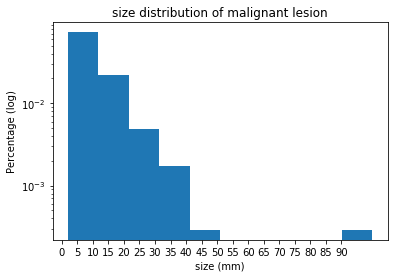

In [18]:
plt.hist(sizesm,bins=10,density=True)
plt.xticks(np.arange(0, 95, 5))
plt.yscale("log")
plt.title("size distribution of malignant lesion")
plt.xlabel('size (mm)')
plt.ylabel('Percentage (log)')
plt.show()


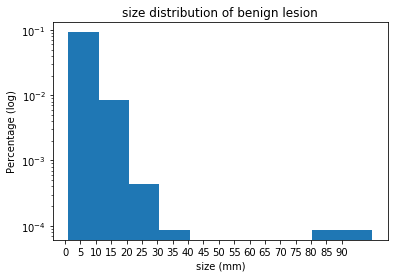

In [19]:
plt.hist(sizesb,bins=10,density=True)
plt.xticks(np.arange(0, 95, 5))
plt.yscale("log")
plt.title("size distribution of benign lesion")
plt.xlabel('size (mm)')
plt.ylabel('Percentage (log)')
plt.show()


In [20]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

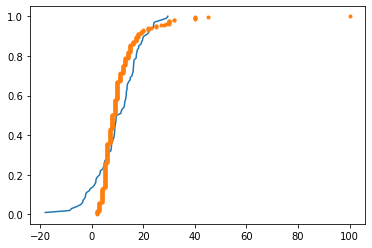

In [21]:
msize_samples=np.random.normal(np.mean(sizesm),np.std(sizesm),size=100)

x_msize_norm,y_msize_norm=ecdf(msize_samples)
x_msize,y_msize=ecdf(sizesm)

plt.plot(x_msize_norm,y_msize_norm)
plt.plot(x_msize,y_msize, marker='.',linestyle='none')

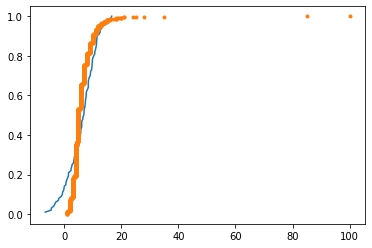

In [22]:
bsize_samples=np.random.normal(np.mean(sizesb),np.std(sizesb),size=100)

x_bsize_norm,y_bsize_norm=ecdf(bsize_samples)
x_bsize,y_bsize=ecdf(sizesb)

plt.plot(x_bsize_norm,y_bsize_norm)
plt.plot(x_bsize,y_bsize, marker='.',linestyle='none')

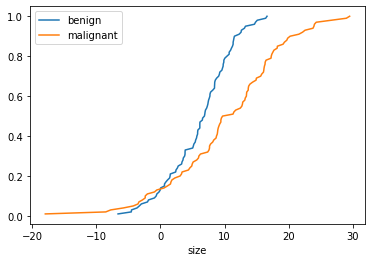

In [23]:
plt.plot(x_bsize_norm,y_bsize_norm,label='benign')
plt.plot(x_msize_norm,y_msize_norm,label='malignant')
plt.xlabel('size')
plt.legend()

Therefore we can deduce that benign lesions are smaller than malignant lesions. A Student's T-test was performed to make sure the difference is significant

In [24]:
from scipy.stats import ttest_ind

def checkttest(a,b):
    pval=ttest_ind(a,b).pvalue
    if pval<=0.01:
        print(pval,"Mean is different enough to be significant")
    else:
        print(pval, "Mean is too similar to be significant")

In [25]:
checkttest(sizesb,sizesm)

2.7279515204510347e-29 Mean is different enough to be significant


Therefore the size of the lesion is significant in determining malignancy.

The age of the patient was also looked into.

In [26]:
malig_age=np.sort(malignant['meta.clinical.age_approx'].dropna())

In [27]:
benign_age=np.sort(benign['meta.clinical.age_approx'].dropna())

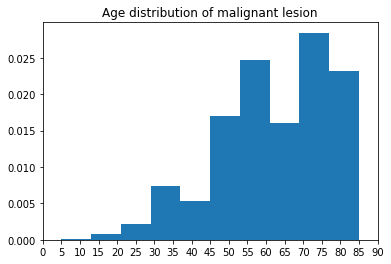

In [28]:
plt.hist(malig_age.tolist(),bins=10,density=True)
plt.xticks(np.arange(0, 95, 5))
plt.title("Age distribution of malignant lesion")
plt.show()


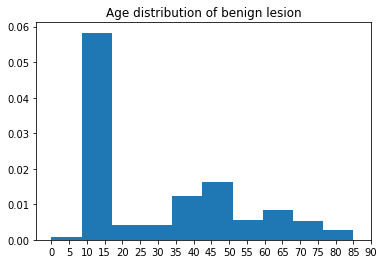

In [29]:
plt.hist(benign_age.tolist(),bins=10,density=True)
plt.xticks(np.arange(0, 95, 5))
plt.title("Age distribution of benign lesion")
plt.show()

The benign data had a sudden big spike on the teenagers. After looking over the data, the dataset 'SONIC' was shown to only contain benign lesion from young students. As this might cause the average patient age in benign lesion to drop significantly, this dataset was removed.

In [30]:
benign_no_sonic=benign[benign['dataset.name'] != 'SONIC']

In [31]:
ben_no_sonic_age=np.sort(benign_no_sonic['meta.clinical.age_approx'].dropna())

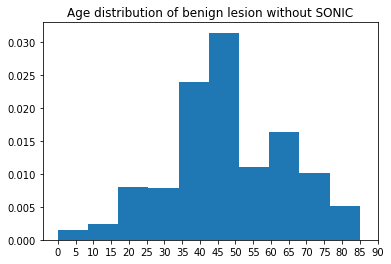

In [32]:
plt.hist(ben_no_sonic_age.tolist(),bins=10,density=True)
plt.xticks(np.arange(0, 95, 5))
plt.title("Age distribution of benign lesion without SONIC")
plt.show()

In [33]:
malig_mean=np.mean(malig_age)
malig_std=np.std(malig_age)
print(malig_mean,malig_std)

62.00411334552103 15.77792297108487


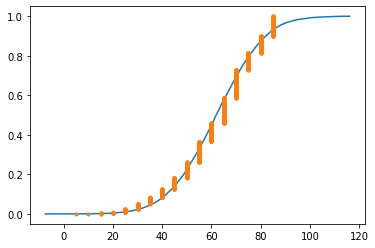

In [34]:
malig_samples=np.random.normal(malig_mean,malig_std,size=10000)

x_malig_norm,y_malig_norm=ecdf(malig_samples)
x_malig,y_malig=ecdf(malig_age)

plt.plot(x_malig_norm,y_malig_norm)
plt.plot(x_malig,y_malig, marker='.',linestyle='none')

In [35]:
ben_mean=np.mean(benign_age)
ben_std=np.std(benign_age)
print(ben_mean,ben_std)

31.51682742713357 20.651396162782493


In [36]:
ben_no_sonic_mean=np.mean(ben_no_sonic_age)
ben_no_sonic_std=np.std(ben_no_sonic_age)
print(ben_no_sonic_mean,ben_no_sonic_std)

47.847837150127226 16.578343629879594


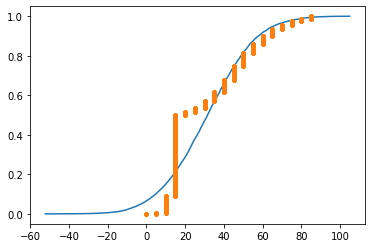

In [37]:
ben_samples=np.random.normal(ben_mean,ben_std,size=10000)

x_ben_norm,y_ben_norm=ecdf(ben_samples)
x_ben,y_ben=ecdf(benign_age)

plt.plot(x_ben_norm,y_ben_norm)
plt.plot(x_ben,y_ben, marker='.',linestyle='none')

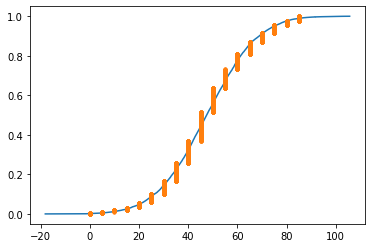

In [38]:
ben_samples=np.random.normal(ben_no_sonic_mean,ben_no_sonic_std,size=10000)

x_ben_norm,y_ben_norm=ecdf(ben_samples)
x_ben,y_ben=ecdf(ben_no_sonic_age)

plt.plot(x_ben_norm,y_ben_norm)
plt.plot(x_ben,y_ben, marker='.',linestyle='none')

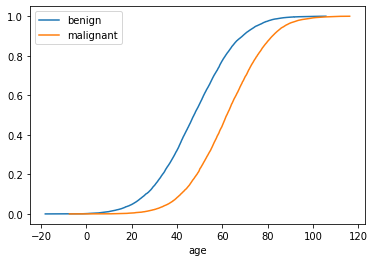

In [39]:
plt.plot(x_ben_norm,y_ben_norm, label='benign')
plt.plot(x_malig_norm,y_malig_norm, label='malignant')
plt.xlabel('age')
plt.legend()

ECDF graph implies that patients with benign lesions are younger than patients with malignant lesion.

In [40]:
checkttest(ben_no_sonic_age,malig_age)

9.37418008472944e-276 Mean is different enough to be significant


In [41]:
checkttest(benign_age,malig_age)

0.0 Mean is different enough to be significant


The result of the T-test confirms that the age is a significant factor in malignancy.

In [42]:
len(df['meta.unstructured.race'])

23906

Text(0.5, 0, 'Race of all patients')

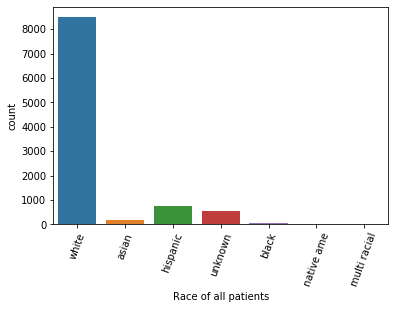

In [43]:
import seaborn as sns
race=df['meta.unstructured.race'].dropna()
race=pd.Series([x.lower() for x in list(race)])
ax=sns.countplot(x=race.index,data=race)
ax.set_xticklabels(race.unique(),rotation=70)
ax.set_xlabel("Race of all patients")

Text(0.5, 0, 'Race of patients with malignant melanoma')

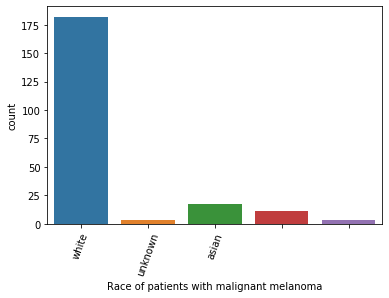

In [44]:
race_mal=malignant['meta.unstructured.race'].dropna()
race_mal=pd.Series([x.lower() for x in list(race_mal)])
ax=sns.countplot(x=race_mal.index,data=race)
ax.set_xticklabels(race_mal.unique(),rotation=70)
ax.set_xlabel("Race of patients with malignant melanoma")

The positions of the mole is also an interesting factor to look into.

In [45]:
# Find the position of moles
mole_positions=df['meta.clinical.anatom_site_general'].dropna()
num_data=mole_positions.value_counts()
num_data_dict=dict(num_data)
print(num_data)

posterior torso    3209
lower extremity    3145
anterior torso     2127
upper extremity    1920
head/neck          1690
lateral torso        75
palms/soles          30
Name: meta.clinical.anatom_site_general, dtype: int64


In [46]:
import seaborn as sns

Text(0.5, 0, 'positions of moles')

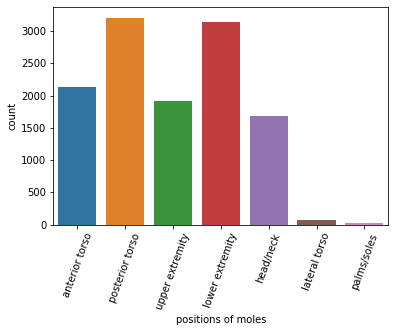

In [47]:
ax=sns.countplot(x=mole_positions.index,data=mole_positions)
ax.set_xticklabels(mole_positions.unique(),rotation=70)
ax.set_xlabel("positions of moles")

The lesion itself tends to show up the most on posterior torso or lower extremity. However, this may be because a lot of people who see a mole in those area feel the need to come to the hospital more than the people who find a mole on their palm.

In [48]:
# Find the positions of MALIGNANT moles
mole_positions_m=malignant['meta.clinical.anatom_site_general'].dropna()
num_data_m=mole_positions_m.value_counts()
num_data_m_dict=dict(num_data_m)
print(num_data_m)

posterior torso    538
upper extremity    455
lower extremity    405
head/neck          374
anterior torso     260
lateral torso       16
palms/soles          8
Name: meta.clinical.anatom_site_general, dtype: int64


In [49]:
# make a dictionary of percentage of lesion with malignancy
new_dict={k: num_data_m_dict[k] / num_data_dict[k] for k in num_data_dict if k in num_data_m_dict}

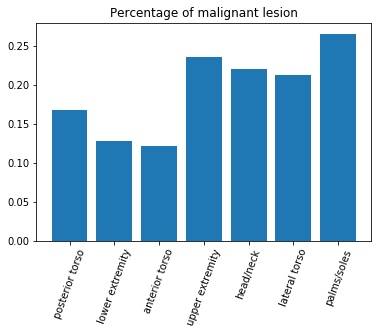

In [50]:
plt.bar(range(len(new_dict)), new_dict.values(), align='center')
plt.xticks(range(len(new_dict)), list(new_dict.keys()),rotation=70)
plt.title("Percentage of malignant lesion")
plt.show()

The mole on the palms or soles are more likely to be malignant than others. Posterior torso, lower extremity, and anterior torso all seem to be less likely to develop malignant lesion than other parts. This may be due to melanoma developing from exposure to UV light as upper part of the body and palms are more likely to be exposed than the lower body part.